In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the training and testing datasets
train_data = pd.read_csv('mobile_price_train.csv')  # Replace with your training dataset file name
test_data = pd.read_csv('mobile_price_test.csv')    # Replace with your testing dataset file name

# Splitting the datasets into features (X) and target (y)
X_train = train_data.drop(columns=['price_range'])  # Assuming 'price_range' is the target variable
y_train = train_data['price_range']

# Drop unseen columns (like 'id') from the test dataset
X_test = test_data.drop(columns=['id'], errors='ignore')  # Safely drop 'id' or any irrelevant columns

# Check that X_test contains the same feature columns as X_train
X_test = X_test[X_train.columns]

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predictions for training and testing data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)  # Predicting for the test dataset

# Adding the predicted price range to the test dataset
test_data['predicted_price_range'] = y_test_pred

# Save the modified test dataset to a new CSV file
test_data.to_csv('mobile_price_test_with_predictions.csv', index=False)

# Generating classification reports for training data (optional for debugging)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Generating confusion matrix for training data (optional for debugging)
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

print("Predicted values for the test dataset have been saved to 'mobile_price_test_with_predictions.csv'")


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix for Training Data:
[[500   0   0   0]
 [  0 500   0   0]
 [  0   0 500   0]
 [  0   0   0 500]]
Predicted values for the test dataset have been saved to 'mobile_price_test_with_predictions.csv'



Basic Insights:
       battery_power         blue  clock_speed     dual_sim           fc  \
count    3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     1241.849000     0.502000     1.528467     0.512000     4.404000   
std       437.063804     0.500079     0.820358     0.499939     4.383742   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       863.750000     0.000000     0.700000     0.000000     1.000000   
50%      1232.000000     1.000000     1.500000     1.000000     3.000000   
75%      1619.000000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000  ...   
mean      0.510000    32.581667     0.507000   140.003000     4.456333  ...   
std       0.499983    18.152810     0.285969    35.213809    

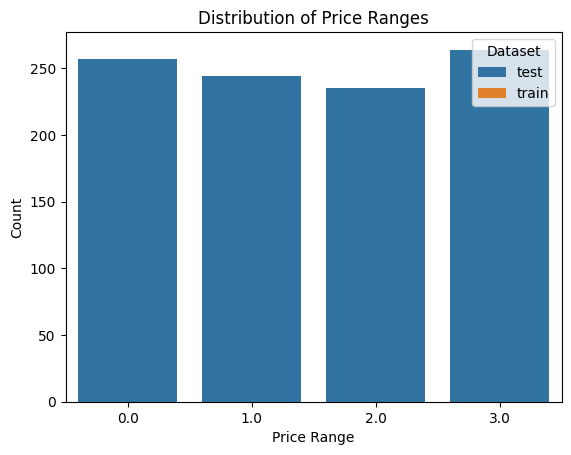

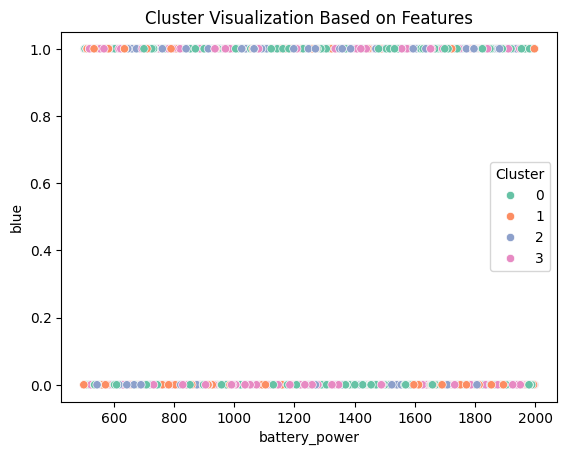


Cluster Insights:
         battery_power      blue  clock_speed  dual_sim        fc    four_g  \
cluster                                                                       
0          1240.446429  0.503348     1.513839  0.496652  4.422991  0.520089   
1          1236.171908  0.505241     1.564570  0.524109  4.396226  0.526205   
2          1229.953079  0.530792     1.510997  0.548387  4.354839  0.501466   
3          1254.629630  0.478307     1.536720  0.494180  4.425397  0.498413   

         int_memory     m_dep   mobile_wt   n_cores  ...     px_width  \
cluster                                              ...                
0         31.938616  0.503237  139.369420  4.503348  ...  1150.710938   
1         33.438155  0.518239  140.104822  4.446541  ...  1671.591195   
2         33.407625  0.507918  141.130499  4.354839  ...  1019.865103   
3         32.162963  0.504233  139.738624  4.489947  ...  1289.810582   

                 ram       sc_h      sc_w  talk_time   three_g  tou

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and testing datasets
train_data = pd.read_csv('mobile_price_train.csv')  # Replace with your training dataset file name

test_data = pd.read_csv('mobile_price_test_with_predictions.csv')  # Replace with your test dataset file name

test_data = test_data.drop(columns=['id'], errors='ignore')  # Drop the 'id' column if present in the test dataset

# Combine train and test datasets for analysis
combined_data = pd.concat([
    train_data.assign(dataset="train"),
    test_data.assign(dataset="test")
], ignore_index=True)

# Generating insights
print("\nBasic Insights:")
print(combined_data.describe())

# Visualizing price range distribution
sns.countplot(data=combined_data, x="predicted_price_range", hue="dataset")
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.legend(title="Dataset")
plt.show()

# Clustering mobiles based on features
kmeans = KMeans(n_clusters=4, random_state=42)
feature_columns = [col for col in combined_data.columns if col not in ['price_range', 'predicted_price_range', 'dataset']]
clusters = kmeans.fit_predict(combined_data[feature_columns].fillna(0))
combined_data['cluster'] = clusters

# Visualize clusters using two principal features (example)
sns.scatterplot(
    x=combined_data[feature_columns[0]],
    y=combined_data[feature_columns[1]],
    hue=combined_data['cluster'],
    palette="Set2"
)
plt.title("Cluster Visualization Based on Features")
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.legend(title="Cluster")
plt.show()

# Analyze clusters
cluster_insights = combined_data.groupby('cluster').mean(numeric_only=True)
print("\nCluster Insights:")
print(cluster_insights)

# Save combined dataset with clusters
combined_data.to_csv('combined_mobile_data_with_clusters.csv', index=False)

print("Combined dataset with actionable insights and clusters saved to 'combined_mobile_data_with_clusters.csv'")